# Importing all the libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

# Importing csv file and exploring its structure

In [11]:
# Importing csv file into a dataframe
df=pd.read_csv("Amazon-Products.csv/Amazon-Products.csv", index_col=False)

In [12]:
# Describing data with pandas
df.dtypes

Unnamed: 0         int64
name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object

In [13]:
len(df)

551585

In [14]:
# Selecting and viewwing data
df.head(5)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


To proceed with cleaning the data, let us first get rid of the Unnamed:0 column
(The Unnamed: 0 column often appears when importing a CSV file in Pandas if the file contains an unnamed column, typically resulting from an index column being saved in the CSV)

In [15]:
df=df.drop("Unnamed: 0",axis=1)

In [17]:
# Selecting columns
df.sub_category

0         Air Conditioners
1         Air Conditioners
2         Air Conditioners
3         Air Conditioners
4         Air Conditioners
                ...       
551580                Yoga
551581                Yoga
551582                Yoga
551583                Yoga
551584                Yoga
Name: sub_category, Length: 551585, dtype: object

In [19]:
# Aggregating 2 columns together
pd.crosstab(df["main_category"],df["ratings"])

ratings,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,4.9,5.0,FREE,Get,₹100,₹2.99,₹65,₹68.99,₹70,₹99
main_category,,,,,,,,,,,,,,,,,,,,,
accessories,1597,0,4,15,36,91,27,38,60,63,...,104,8411,98,1933,0,2,1,0,0,0
appliances,467,0,7,5,13,19,12,25,27,23,...,54,1666,13,453,0,0,0,0,0,0
bags & luggage,104,0,0,1,3,9,0,3,3,4,...,9,483,1023,0,0,0,0,0,0,14
beauty & health,123,1,0,1,1,6,2,2,6,5,...,21,555,4,217,0,0,0,0,0,0
car & motorbike,136,0,3,1,5,3,2,4,10,11,...,8,471,0,109,0,0,0,0,0,0
grocery & gourmet foods,15,0,0,0,1,2,0,0,1,0,...,5,180,0,22,0,0,0,0,0,0
home & kitchen,85,0,0,3,0,7,3,6,7,6,...,25,792,0,138,0,0,0,0,0,0
"home, kitchen, pets",2,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
industrial supplies,89,0,0,2,0,2,1,0,5,3,...,4,312,0,86,0,0,0,0,0,0


# Manipulating data

Assigning the columns with their appropriate data types: 

In [21]:
# Initial datatypes
df.dtypes

name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object

In [22]:
# name, main_category and sub_category columns
df["name"]=df["name"].astype(str)
df["main_category"]=df["main_category"].astype(str)
df["sub_category"]=df["sub_category"].astype(str)

In [26]:
df["image"]=df["image"].astype(str)
df["link"]=df["link"].astype(str)

In [25]:
# Verify that each element in the column is of type 'str'
all_elements_are_strings = df['name'].apply(lambda x: isinstance(x, str)).all()
print(f"\nAll elements are strings: {all_elements_are_strings}")


All elements are strings: True


In [27]:
# Getting rid of invalid values from 'ratings' column
df['ratings'].value_counts()

ratings
4.0       36609
5.0       32875
3.9       27095
3.8       25305
4.1       24810
3.7       22190
4.2       21714
3.6       19482
4.3       17601
3.5       17595
4.4       13809
3.4       13006
4.5       12618
3.0       11797
3.3       10905
4.6        8348
3.2        8169
1.0        8120
3.1        6515
4.7        5365
Get        4852
2.9        4139
2.0        3133
2.8        3044
2.7        2523
2.5        2423
4.8        2343
2.6        2000
FREE       1357
2.4        1253
2.3         962
2.2         761
2.1         639
4.9         521
1.5         484
1.9         358
1.8         320
1.7         225
1.4         211
1.6         171
1.3          92
1.2          27
₹99          14
₹70           5
₹2.99         2
1.1           1
₹65           1
₹68.99        1
₹100          1
Name: count, dtype: int64

In [28]:
df['no_of_ratings'].value_counts()

no_of_ratings
1        39816
2        24737
3        18105
4        14376
5        11645
         ...  
6,616        1
7,708        1
2,702        1
4,471        1
4,528        1
Name: count, Length: 8342, dtype: int64

In [30]:
df['discount_price'].value_counts()

discount_price
₹499       18248
₹299       15337
₹399       14510
₹999       13000
₹599       11760
           ...  
₹711.19        1
₹424.95        1
₹476.52        1
₹198.32        1
₹103.98        1
Name: count, Length: 27511, dtype: int64

In [31]:
df['actual_price'].value_counts()

actual_price
₹999         48774
₹1,999       25795
₹1,499       18809
₹499         14406
₹1,299       14068
             ...  
₹2,234           1
₹2,207.20        1
₹608.97          1
₹27,775          1
₹21,204          1
Name: count, Length: 23170, dtype: int64

# Manipulation techniques to use:

ratings = Note the non-numeric data and, handle them. Convert dtype.

no_of_ratings = eliminate commas. Convert dtype.

discount_price = eliminate commas and rupees sign. Convert dtype.

actual_price = eliminate commas and rupees sign. Convert dtype.

In [32]:
df = df[df['ratings'] != 'Get']

In [33]:
df

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
551583,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN


In [35]:
df = df[df['ratings'] != 'FREE']
df

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
551583,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN


In [36]:
df['ratings'].value_counts()

ratings
4.0       36609
5.0       32875
3.9       27095
3.8       25305
4.1       24810
3.7       22190
4.2       21714
3.6       19482
4.3       17601
3.5       17595
4.4       13809
3.4       13006
4.5       12618
3.0       11797
3.3       10905
4.6        8348
3.2        8169
1.0        8120
3.1        6515
4.7        5365
2.9        4139
2.0        3133
2.8        3044
2.7        2523
2.5        2423
4.8        2343
2.6        2000
2.4        1253
2.3         962
2.2         761
2.1         639
4.9         521
1.5         484
1.9         358
1.8         320
1.7         225
1.4         211
1.6         171
1.3          92
1.2          27
₹99          14
₹70           5
₹2.99         2
1.1           1
₹65           1
₹68.99        1
₹100          1
Name: count, dtype: int64

Getting rid of the values starting with the 'rupees' sign

In [46]:
filtered_df = df[df['ratings'].apply(lambda x: isinstance(x, str) and not x.startswith('₹'))]

In [47]:
filtered_df['ratings'].value_counts()

ratings
4.0    36609
5.0    32875
3.9    27095
3.8    25305
4.1    24810
3.7    22190
4.2    21714
3.6    19482
4.3    17601
3.5    17595
4.4    13809
3.4    13006
4.5    12618
3.0    11797
3.3    10905
4.6     8348
3.2     8169
1.0     8120
3.1     6515
4.7     5365
2.9     4139
2.0     3133
2.8     3044
2.7     2523
2.5     2423
4.8     2343
2.6     2000
2.4     1253
2.3      962
2.2      761
2.1      639
4.9      521
1.5      484
1.9      358
1.8      320
1.7      225
1.4      211
1.6      171
1.3       92
1.2       27
1.1        1
Name: count, dtype: int64

In [48]:
# Initial dtype
filtered_df['ratings'].dtype

dtype('O')

In [59]:
print(filtered_df['ratings'].unique())

[4.2 4.  4.1 4.3 3.9 3.8 3.5 4.6 3.3 3.4 3.7 2.9 5.  4.4 3.6 2.7 4.5 3.
 3.1 3.2 4.8 4.7 2.5 1.  2.6 2.8 2.3 1.7 1.8 2.4 4.9 2.2 1.6 1.9 2.  1.4
 2.1 1.2 1.3 1.5 1.1]


In [57]:
filtered_df.loc[:, 'ratings'] = pd.to_numeric(filtered_df['ratings'], errors='coerce')

In [58]:
print("Data type of 'ratings' after conversion:", filtered_df['ratings'].dtype)

Data type of 'ratings' after conversion: float64


In [60]:
filtered_df.dtypes

name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings      object
discount_price     object
actual_price       object
dtype: object

Handle 'no_of_ratings' column:

In [62]:
filtered_df.loc[:, 'no_of_ratings'] = filtered_df['no_of_ratings'].str.replace(',', '')

In [73]:
filtered_df.loc[:, 'no_of_ratings'] = filtered_df['no_of_ratings'].fillna(0).astype(int)

In [74]:
filtered_df.dtypes

name                     object
main_category            object
sub_category             object
image                    object
link                     object
ratings                 float64
no_of_ratings             int64
discount_price           object
actual_price             object
no_of_ratingsratings    float64
dtype: object

Handling actual_price and discount_price:

Deleting rows where both of these are null, and copying value of actual_price to discount_price where discount_price is null

In [75]:
len(filtered_df)

369558

In [76]:
df=filtered_df.dropna(subset=['discount_price', 'actual_price'], how='all')

In [77]:
len(df)

362797

In [79]:
df['discount_price'] = df['discount_price'].fillna(df['actual_price'])

C:\Users\Jeenisha Shrungare\AppData\Local\Temp\ipykernel_18736\2762567368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount_price'] = df['discount_price'].fillna(df['actual_price'])


In [80]:
df[df['discount_price'].isna()]

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,no_of_ratingsratings


In [81]:
df[df['actual_price'].isna()]

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,no_of_ratingsratings


In [82]:
df = df.rename(columns={'discount_price': 'discount_price(in ₹)', 'actual_price': 'actual_price(in ₹)'})

In [83]:
df.loc[:, 'discount_price(in ₹)'] = df['discount_price(in ₹)'].str.replace(',', '')

In [84]:
df.loc[:, 'actual_price(in ₹)'] = df['actual_price(in ₹)'].str.replace(',', '')

In [85]:
df.loc[:, 'discount_price(in ₹)'] = df['discount_price(in ₹)'].str.replace('₹', '')

In [86]:
df.loc[:, 'actual_price(in ₹)'] = df['actual_price(in ₹)'].str.replace('₹', '')

In [87]:
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price(in ₹),actual_price(in ₹),no_of_ratingsratings
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999,58990,2255.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490,75990,2948.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206,34490,61990,1206.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990,68990,69.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490,67790,630.0


In [90]:
df.dtypes

name                     object
main_category            object
sub_category             object
image                    object
link                     object
ratings                 float64
no_of_ratings             int64
discount_price(in ₹)     object
actual_price(in ₹)       object
dtype: object

In [91]:
df['discount_price(in ₹)'] = df['discount_price(in ₹)'].astype(float)

In [93]:
df['actual_price(in ₹)'] = df['actual_price(in ₹)'].astype(float)

In [94]:
df.dtypes

name                     object
main_category            object
sub_category             object
image                    object
link                     object
ratings                 float64
no_of_ratings             int64
discount_price(in ₹)    float64
actual_price(in ₹)      float64
dtype: object

In [95]:
# Check if we have handled all null values
df.isna().sum()

name                    0
main_category           0
sub_category            0
image                   0
link                    0
ratings                 0
no_of_ratings           0
discount_price(in ₹)    0
actual_price(in ₹)      0
dtype: int64

In [96]:
df.describe()

,ratings,no_of_ratings,discount_price(in ₹),actual_price(in ₹)
count,362797.000000,362797.000000,3.627970e+05,3.627970e+05
mean,3.831513,834.994143,2.047350e+03,3.088094e+04
std,0.754399,8608.775405,6.904556e+03,1.643658e+07
min,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,3.500000,4.000000,3.690000e+02,8.990000e+02
50%,3.900000,20.000000,6.100000e+02,1.499000e+03
75%,4.300000,133.000000,1.299000e+03,2.900000e+03
max,5.000000,589547.000000,1.249990e+06,9.900000e+09


# Histograms + KDE plot analysis (pt 1)

1. Values for no_of_ratings, discount_price(in ₹) and actual_price(in ₹) have a wide range, with very high maximum values and significant standard deviations.
2. For highly skewed data, using a logarithmic scale can spread out the values more evenly.

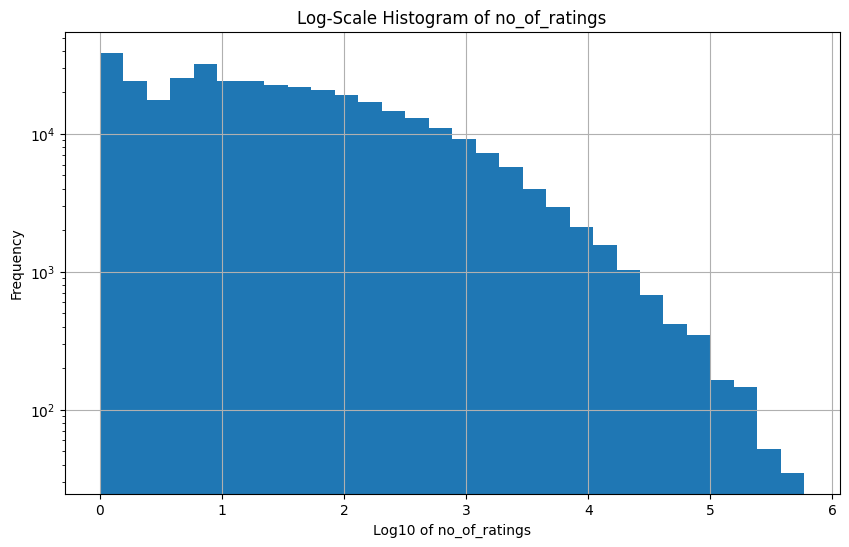

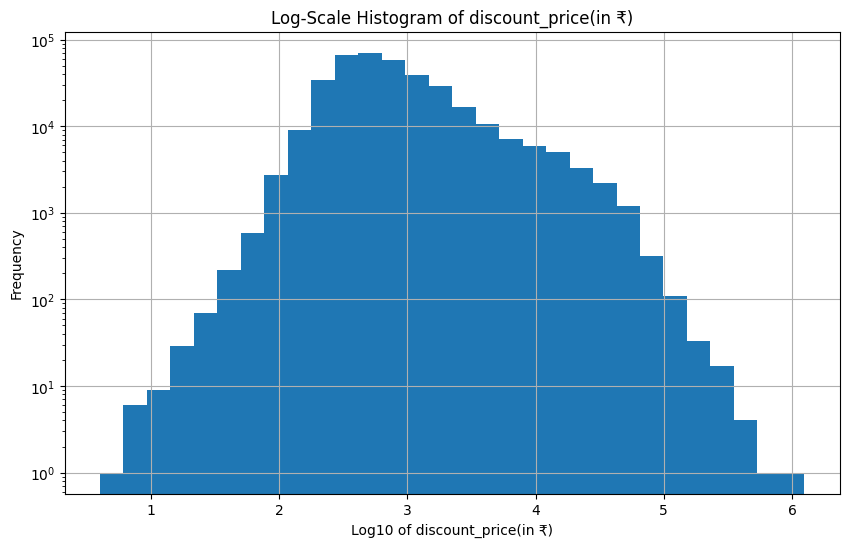

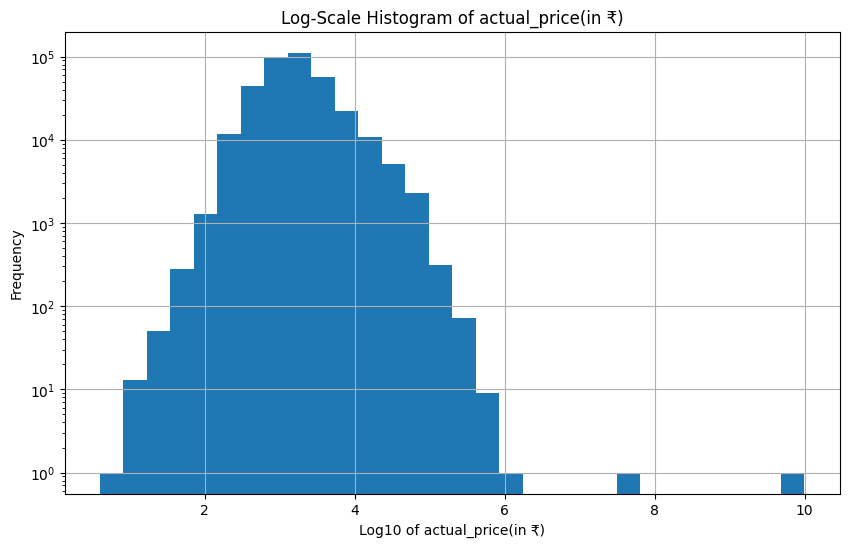

In [98]:
for column in ['no_of_ratings', 'discount_price(in ₹)', 'actual_price(in ₹)']:
    plt.figure(figsize=(10, 6))
    df[column].apply(lambda x: np.log10(x) if x > 0 else np.nan).hist(bins=30)
    plt.yscale('log')
    plt.title(f'Log-Scale Histogram of {column}')
    plt.xlabel(f'Log10 of {column}')
    plt.ylabel('Frequency')
    plt.show()

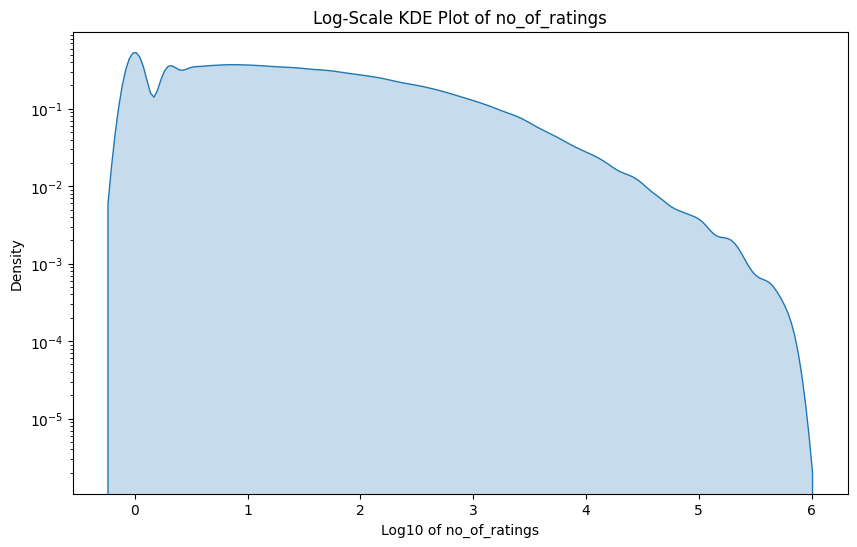

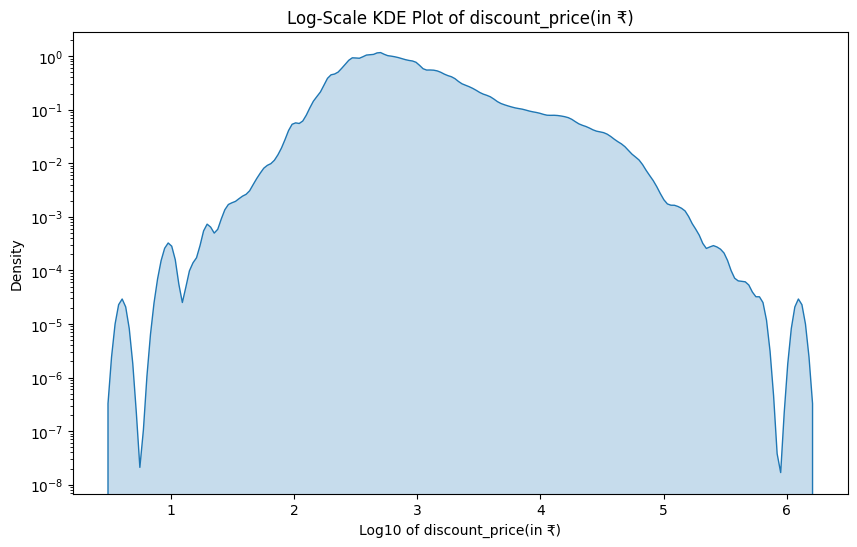

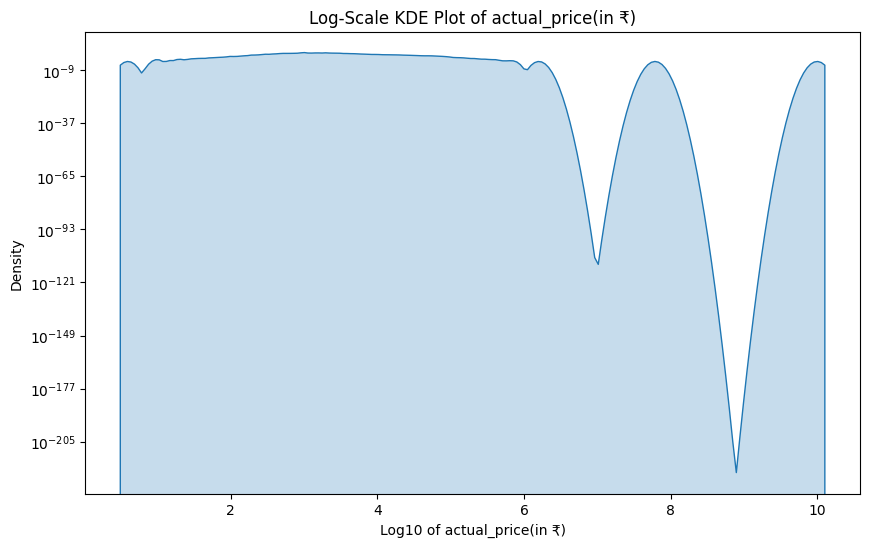

In [100]:
for column in ['no_of_ratings', 'discount_price(in ₹)', 'actual_price(in ₹)']:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column].apply(lambda x: np.log10(x) if x > 0 else np.nan), fill=True)
    plt.yscale('log')
    plt.title(f'Log-Scale KDE Plot of {column}')
    plt.xlabel(f'Log10 of {column}')
    plt.ylabel('Density')
    plt.show()

# Histograms + KDE plot analysis (pt 2)

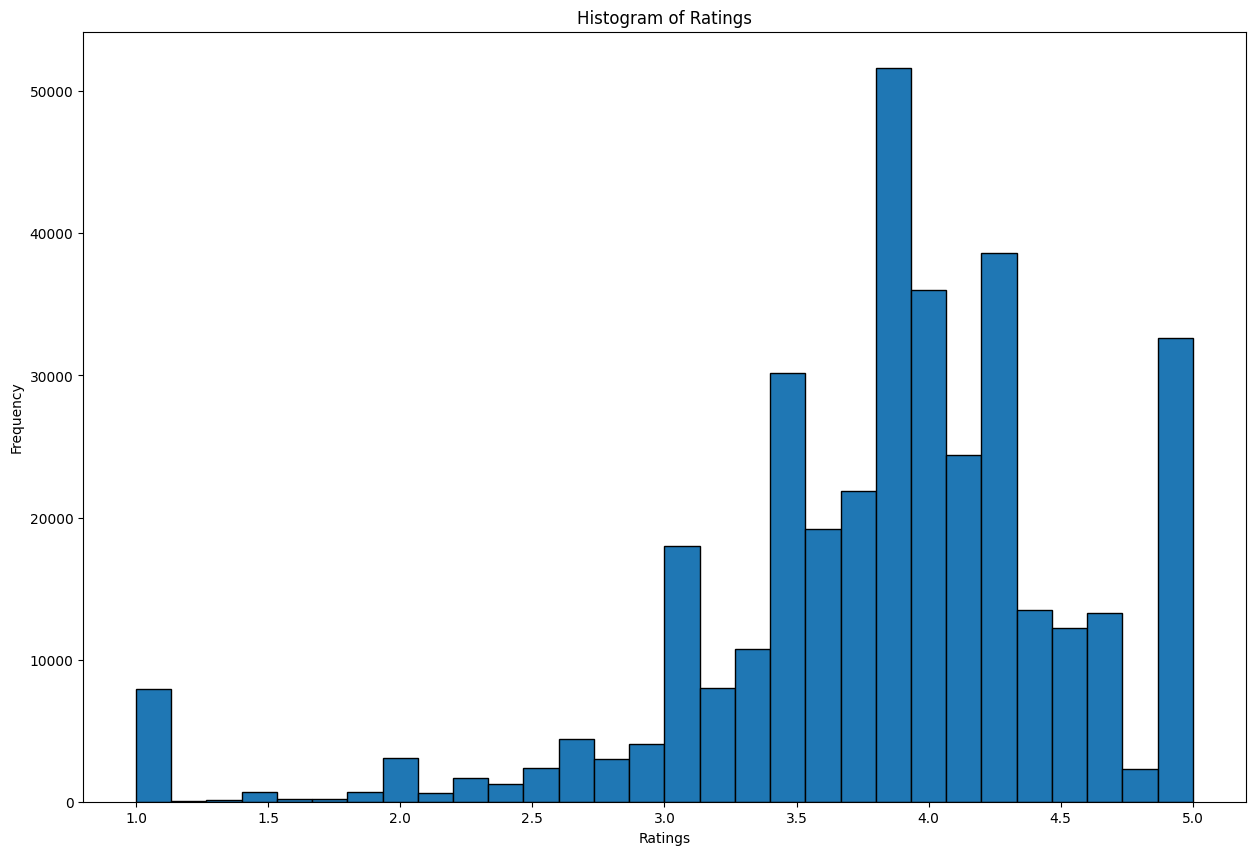

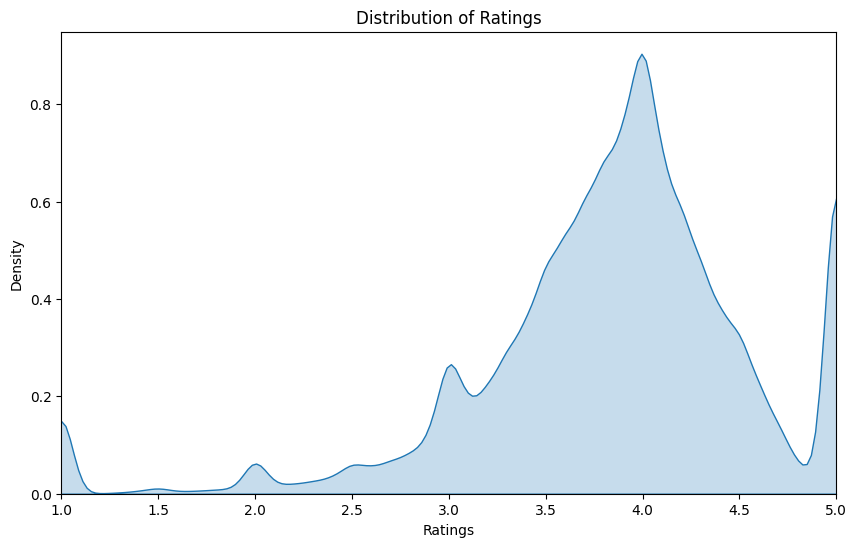

In [101]:
plt.figure(figsize=(15, 10))
df['ratings'].hist(bins=30, grid=False, edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# KDE plot for the 'ratings' column
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ratings'], fill=True)
plt.xlim(df['ratings'].min(), df['ratings'].max())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.show()

# Categorical analysis

In [102]:
df["main_category"].value_counts()

main_category
accessories                66110
women's clothing           63602
tv, audio & cameras        48533
men's clothing             40906
men's shoes                28134
stores                     27958
appliances                 26499
home & kitchen             13204
sports & fitness            8698
beauty & health             7644
kids' fashion               6251
car & motorbike             5616
toys & baby products        5212
bags & luggage              3591
grocery & gourmet foods     2998
industrial supplies         2814
women's shoes               2785
pet supplies                1410
music                        819
home, kitchen, pets           13
Name: count, dtype: int64

In [103]:
df["sub_category"].value_counts()

sub_category
Clothing                   17618
Men's Fashion              17117
Bags & Luggage             16584
Ethnic Wear                15827
Western Wear               15513
                           ...  
STEM Toys Store               46
Fashion Sales & Deals         43
Toys Gifting Store            24
International Toy Store       18
Refurbished & Open Box        13
Name: count, Length: 112, dtype: int64

In [104]:
df[df["sub_category"]=="All Appliances"]

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price(in ₹),actual_price(in ₹)
720,Pigeon by Stovekraft Amaze Plus Electric Kettl...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Lt...,3.9,128941,599.0,1245.0
721,Pigeon Polypropylene Mini Handy and Compact Ch...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...,4.1,274505,199.0,545.0
722,Glun Multipurpose Portable Electronic Digital ...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Multipurpose-Portable-El...,3.8,365,199.0,899.0
723,beatXP Kitchen Scale Multipurpose Portable Ele...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,3290,299.0,1999.0
724,Bajaj DX-6 1000W Dry Iron with Advance Solepla...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-Majesty-1000-Watt-...,4.2,24380,625.0,1400.0
...,...,...,...,...,...,...,...,...,...
10290,WHOLER Commercial 50 LPH Ro Water Purifier wit...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/50-LPH-Commercial-RO-Sta...,3.7,32,6799.0,16499.0
10291,Kaizen Swimming Pool Heavy Duty In-Ground Pool...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Swimming-Ground-Vacuum-S...,2.9,5,1850.0,3250.0
10292,Butterfly 750 Watts 4 Jar Mixer Grinder and 90...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Butterfly-Watts-Grinder-...,4.1,33,3123.0,6382.0
10293,Bajaj Bahar 150 mm Exhaust Fan (Metallic Grey),appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bahar-150-Exhaust-Metall...,3.9,337,1489.0,1940.0


In [105]:
df['sub_category'] = df['sub_category'].replace('All Appliances', 'Miscellaneous')

In [106]:
df[df["sub_category"]=="Miscellaneous"]

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price(in ₹),actual_price(in ₹)
720,Pigeon by Stovekraft Amaze Plus Electric Kettl...,appliances,Miscellaneous,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Lt...,3.9,128941,599.0,1245.0
721,Pigeon Polypropylene Mini Handy and Compact Ch...,appliances,Miscellaneous,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...,4.1,274505,199.0,545.0
722,Glun Multipurpose Portable Electronic Digital ...,appliances,Miscellaneous,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Multipurpose-Portable-El...,3.8,365,199.0,899.0
723,beatXP Kitchen Scale Multipurpose Portable Ele...,appliances,Miscellaneous,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,3290,299.0,1999.0
724,Bajaj DX-6 1000W Dry Iron with Advance Solepla...,appliances,Miscellaneous,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-Majesty-1000-Watt-...,4.2,24380,625.0,1400.0
...,...,...,...,...,...,...,...,...,...
10290,WHOLER Commercial 50 LPH Ro Water Purifier wit...,appliances,Miscellaneous,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/50-LPH-Commercial-RO-Sta...,3.7,32,6799.0,16499.0
10291,Kaizen Swimming Pool Heavy Duty In-Ground Pool...,appliances,Miscellaneous,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Swimming-Ground-Vacuum-S...,2.9,5,1850.0,3250.0
10292,Butterfly 750 Watts 4 Jar Mixer Grinder and 90...,appliances,Miscellaneous,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Butterfly-Watts-Grinder-...,4.1,33,3123.0,6382.0
10293,Bajaj Bahar 150 mm Exhaust Fan (Metallic Grey),appliances,Miscellaneous,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bahar-150-Exhaust-Metall...,3.9,337,1489.0,1940.0


In [108]:
# Analyzing grouped counts
grouped_counts=df.groupby('main_category')['sub_category'].value_counts()

In [109]:
grouped_counts_df = grouped_counts.reset_index(name='counts')

In [110]:
grouped_counts_df

,main_category,sub_category,counts
0,accessories,Bags & Luggage,16584
1,accessories,Fashion & Silver Jewellery,15173
2,accessories,Handbags & Clutches,13195
3,accessories,Jewellery,11406
4,accessories,Watches,8397
...,...,...,...
107,women's clothing,Western Wear,15513
108,women's clothing,Lingerie & Nightwear,14644
109,women's shoes,Shoes,1408
110,women's shoes,Fashion Sandals,931


In [111]:
# Notice that the brand name for a product, is mostly the first or the first two words, and we can extract the first two words to create a 'brand' column 

In [112]:
def extract_brand(name):
    match = re.match(r'([A-Za-z0-9]+\s[A-Za-z0-9]+|[A-Za-z0-9]+)', name)
    if match:
        return match.group()
    return 'Unknown'

df['brand'] = df['name'].apply(extract_brand)

In [113]:
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price(in ₹),actual_price(in ₹),brand
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999.0,58990.0,Lloyd 1
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490.0,75990.0,LG 1
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206,34490.0,61990.0,LG 1
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990.0,68990.0,LG 1
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490.0,67790.0,Carrier 1


In [116]:
# Top brands
brand_df=df['brand'].value_counts().sort_values(ascending=False)

In [117]:
brand_df

brand
Amazon Brand        3082
U                   2207
Van Heusen          1931
Red Tape            1433
Levi                1423
                    ... 
Strauss Knockout       1
LYCAN Beast            1
ans Winpro             1
Korbax Club            1
OTF Vata               1
Name: count, Length: 97589, dtype: int64

In [114]:
df['discount_percentage'] = ((df['actual_price(in ₹)'] - df['discount_price(in ₹)']) / df['actual_price(in ₹)'] * 100).round(2)

In [122]:
df['main_category'].value_counts()

main_category
accessories                66110
women's clothing           63602
tv, audio & cameras        48533
men's clothing             40906
men's shoes                28134
stores                     27958
appliances                 26499
home & kitchen             13204
sports & fitness            8698
beauty & health             7644
kids' fashion               6251
car & motorbike             5616
toys & baby products        5212
bags & luggage              3591
grocery & gourmet foods     2998
industrial supplies         2814
women's shoes               2785
pet supplies                1410
music                        819
home, kitchen, pets           13
Name: count, dtype: int64

On examining the 'main_category' section of the df, we can figure out that some categories can be combined into one for aggregation.
 For example: "men's clothing" and "men's shoes" can be combined to a "Men's fashion" category; and similarly,
    "women's clothing" and "women's shoes" can be combined to a "Women's fashion" category.
                                                                                    
                                                                                

In [123]:
df.loc[df['main_category'] == "women's shoes", 'main_category'] = "women's fashion"

In [124]:
df.loc[df['main_category'] == "women's clothing", 'main_category'] = "women's fashion"

In [125]:
df.loc[df['main_category'] == "men's shoes", 'main_category'] = "men's fashion"

In [126]:
df.loc[df['main_category'] == "men's clothing", 'main_category'] = "men's fashion"

In [127]:
df['main_category'].value_counts()

main_category
men's fashion              69040
women's fashion            66387
accessories                66110
tv, audio & cameras        48533
stores                     27958
appliances                 26499
home & kitchen             13204
sports & fitness            8698
beauty & health             7644
kids' fashion               6251
car & motorbike             5616
toys & baby products        5212
bags & luggage              3591
grocery & gourmet foods     2998
industrial supplies         2814
pet supplies                1410
music                        819
home, kitchen, pets           13
Name: count, dtype: int64

### As there are a lot of main_category unique values, I have just considered the top 4 for visualization purposes. I have handled the brand name anomalies at the backend by standardizing them
Standardization approach: This approach standardizes brand names in a dataset by ensuring consistency in their structure. It splits each brand name into parts and checks if names with the same first word (prefix) have different subsequent parts. If they do, the brand name is standardized to just the prefix. If not, the original brand name is retained. This function is applied to the 'brand' column, creating a new 'standardized_brand' column with the standardized or original names. For example, "LG 1.5" and "LG 1" would both become "LG" if all "LG" entries differ in their second part.

In [128]:
tv_df= df[df['main_category']=='tv, audio & cameras']

In [129]:
acc_df= df[df['main_category']=='accessories']

In [131]:
mens_df = df[df['main_category'] == "men's fashion"]

In [132]:
womens_df = df[df['main_category'] == "women's fashion"]

In [134]:
import pandas as pd

def get_top_brands(df, category_name):
    # Convert the brand column to lowercase to ensure case insensitivity
    df['brand'] = df['brand'].str.lower()
    
    top_brands = df['brand'].value_counts().head(15)
    top_brands_df = pd.DataFrame({
        'category': category_name,
        'brand': top_brands.index,
        'count': top_brands.values
    })
    return top_brands_df

# Assume mens_df, womens_df, acc_df, and tv_df are already defined and loaded
mens_top_brands = get_top_brands(mens_df, "Men's fashion")
womens_top_brands = get_top_brands(womens_df, "Women's fashion")
accessories_top_brands = get_top_brands(acc_df, "Accessories")
tv_top_brands = get_top_brands(tv_df, "TV,Audio & Cameras")

# Combine all top brands into a single DataFrame
combined_df = pd.concat([mens_top_brands, womens_top_brands, accessories_top_brands, tv_top_brands], ignore_index=True)

print(combined_df)


              category             brand  count
0        Men's fashion                 u   1880
1        Men's fashion        pepe jeans   1262
2        Men's fashion     peter england   1202
3        Men's fashion          red tape   1105
4        Men's fashion        van heusen   1095
5        Men's fashion        jockey men    971
6        Men's fashion       puma unisex    949
7        Men's fashion              levi    903
8        Men's fashion      amazon brand    883
9        Men's fashion         arrow men    814
10       Men's fashion          puma men    767
11       Men's fashion              jack    748
12       Men's fashion         puma mens    634
13       Men's fashion        spykar men    606
14       Men's fashion        campus men    516
15     Women's fashion      clovia women   1300
16     Women's fashion      amazon brand    896
17     Women's fashion             women    868
18     Women's fashion        biba women    687
19     Women's fashion         max women

C:\Users\Jeenisha Shrungare\AppData\Local\Temp\ipykernel_18736\2481154521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand'] = df['brand'].str.lower()
C:\Users\Jeenisha Shrungare\AppData\Local\Temp\ipykernel_18736\2481154521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand'] = df['brand'].str.lower()
C:\Users\Jeenisha Shrungare\AppData\Local\Temp\ipykernel_18736\2481154521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l